In [198]:
import re
import pandas as pd

#index_col='year_built',

df = pd.read_csv('data/properties.csv',  dtype={'census_tract': object} )
df.head()

,census_tract,coordinates,location,street_name,year_built,year_built_estimate,zip_code
0,023,POINT (-75.162942 39.933671),1119 WHARTON ST,WHARTON,1915.0,NaN,191475003.0
1,083,POINT (-75.240782 39.953394),514 S 59TH ST,59TH,1925.0,NaN,191431915.0
2,083,POINT (-75.240929 39.9527),546 S 59TH ST,59TH,1925.0,NaN,191431915.0
3,082,POINT (-75.241263 39.951092),640 S 59TH ST,59TH,1925.0,Y,191432433.0
4,201,POINT (-75.154961 40.00141),1500 W ALLEGHENY AVE,ALLEGHENY,1925.0,NaN,191321715.0


Split the coordinates column into lat long columns with some regex.

In [199]:
#\s{1}\d+.\d+
df['lat'] = df['coordinates'].str.extract('(?<=\s)(\d+.\d+)', expand=True).dropna().astype(np.float64)
df['lon'] = df['coordinates'].str.extract('(\-\w+.\d*)', expand=True).dropna().astype(np.float64)
df.head()

,census_tract,coordinates,location,street_name,year_built,year_built_estimate,zip_code,lat,lon
0,023,POINT (-75.162942 39.933671),1119 WHARTON ST,WHARTON,1915.0,NaN,191475003.0,39.933671,-75.162942
1,083,POINT (-75.240782 39.953394),514 S 59TH ST,59TH,1925.0,NaN,191431915.0,39.953394,-75.240782
2,083,POINT (-75.240929 39.9527),546 S 59TH ST,59TH,1925.0,NaN,191431915.0,39.952700,-75.240929
3,082,POINT (-75.241263 39.951092),640 S 59TH ST,59TH,1925.0,Y,191432433.0,39.951092,-75.241263
4,201,POINT (-75.154961 40.00141),1500 W ALLEGHENY AVE,ALLEGHENY,1925.0,NaN,191321715.0,40.001410,-75.154961


cheeky google map heatmap - huge filesize and not inline

In [189]:
import gmplot
gmap = gmplot.GoogleMapPlotter.from_geocode("Philadelphia")
gmap.heatmap(lat, lon)
gmap.draw("mymap.html")

In [204]:
p_lng = df.lon
p_lat = df.lat

0        -75.162942
1        -75.240782
2        -75.240929
3        -75.241263
4        -75.154961
5        -75.167902
6        -75.241170
7        -75.241477
8        -75.163842
9        -75.160992
10       -75.161030
11       -75.146201
12       -75.147488
13       -75.147497
14       -75.161229
15       -75.147495
16       -75.147631
17       -75.121484
18       -75.128952
19       -75.131014
20       -75.145714
21       -75.241482
22       -75.161149
23       -75.141883
24       -75.144868
25       -75.144660
26              NaN
27       -75.126849
28       -75.207416
29       -75.197714
            ...    
580012   -74.982974
580013   -74.982974
580014   -74.982974
580015   -74.982974
580016   -74.982974
580017   -74.982974
580018   -74.982974
580019   -74.982974
580020   -74.982974
580021   -74.982974
580022   -74.982974
580023   -74.982974
580024   -74.982974
580025   -74.982974
580026   -74.982974
580027   -74.982974
580028   -74.982974
580029   -74.982974
580030   -74.982974


In [206]:
def lat_lng_to_pixels(lat, lng):
    lat_rad = lat * np.pi / 180.0
    lat_rad = np.log(np.tan((lat_rad + np.pi / 2.0) / 2.0))
    x = 100 * (lng + 180.0) / 360.0
    y = 100 * (lat_rad - np.pi) / (2.0 * np.pi)
    return (x, y)

px, py = lat_lng_to_pixels(p_lat, p_lng)

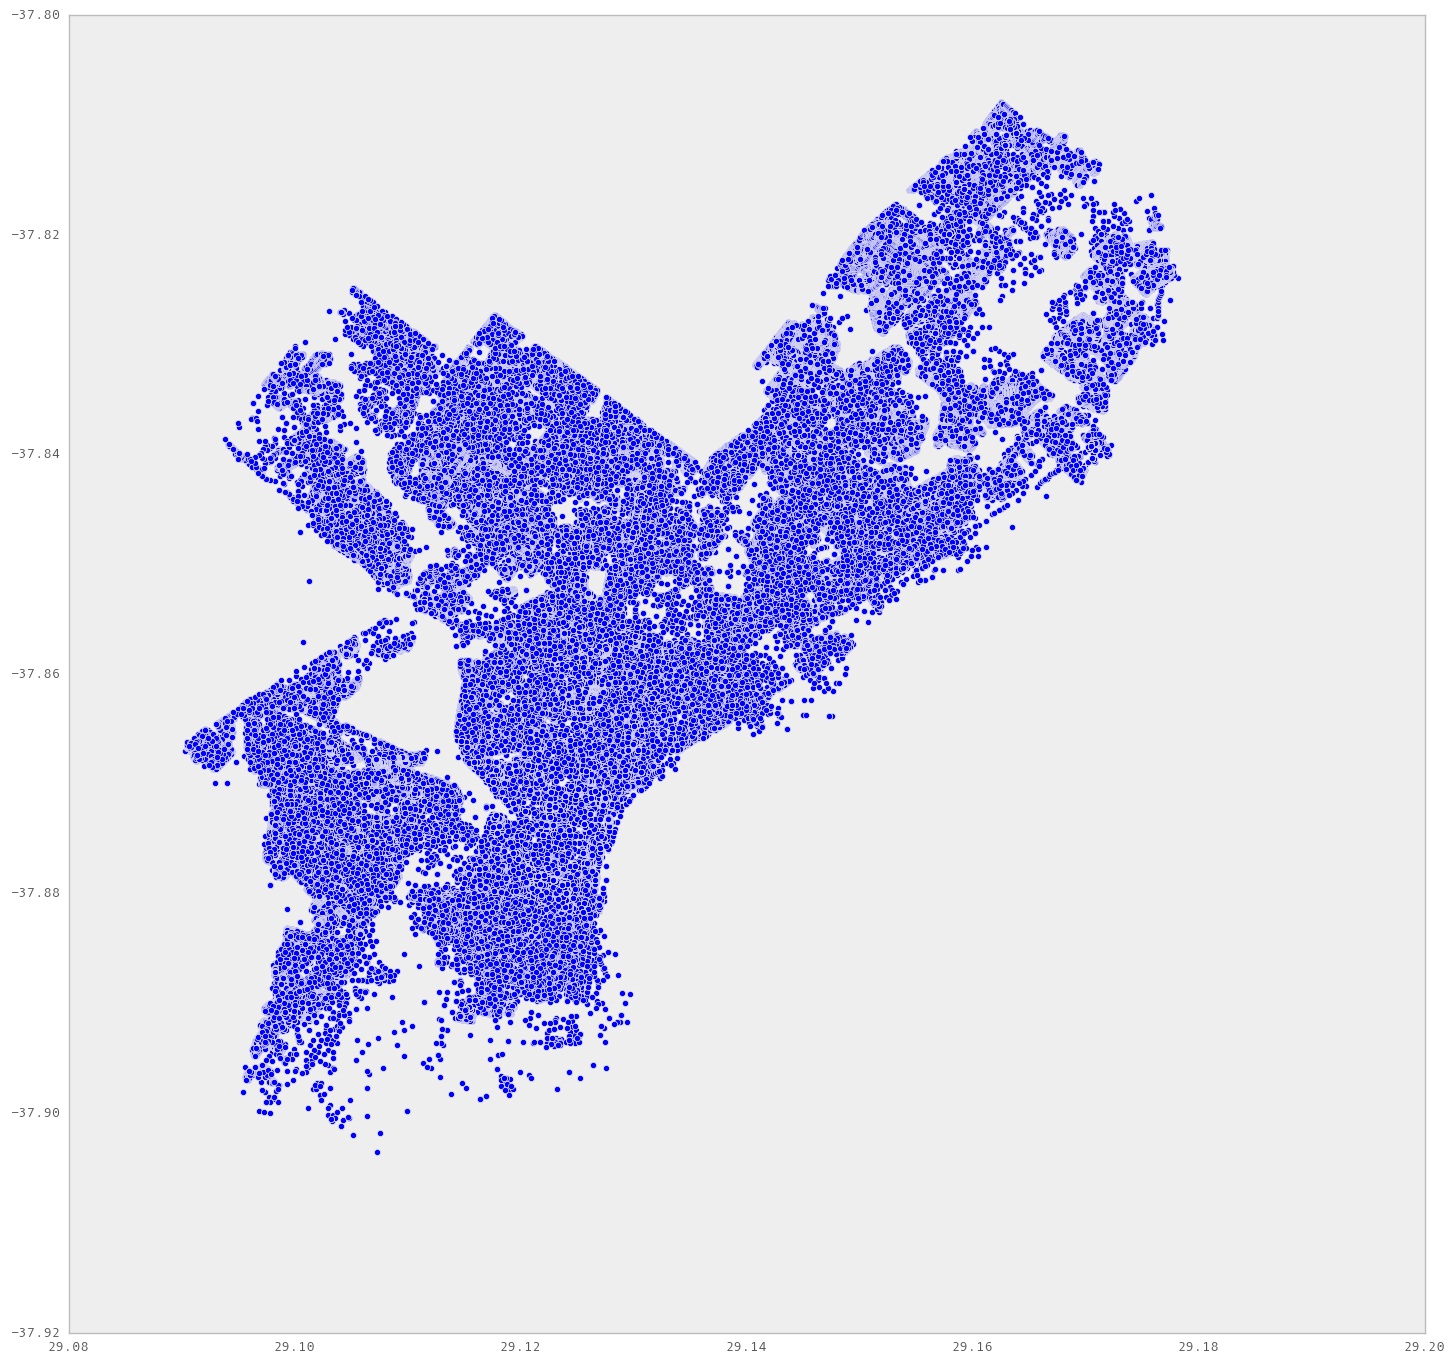

In [210]:
plt.scatter(px, py)

(29.079999999999998,
 29.199999999999999,
 -37.920000000000002,
 -37.799999999999997)

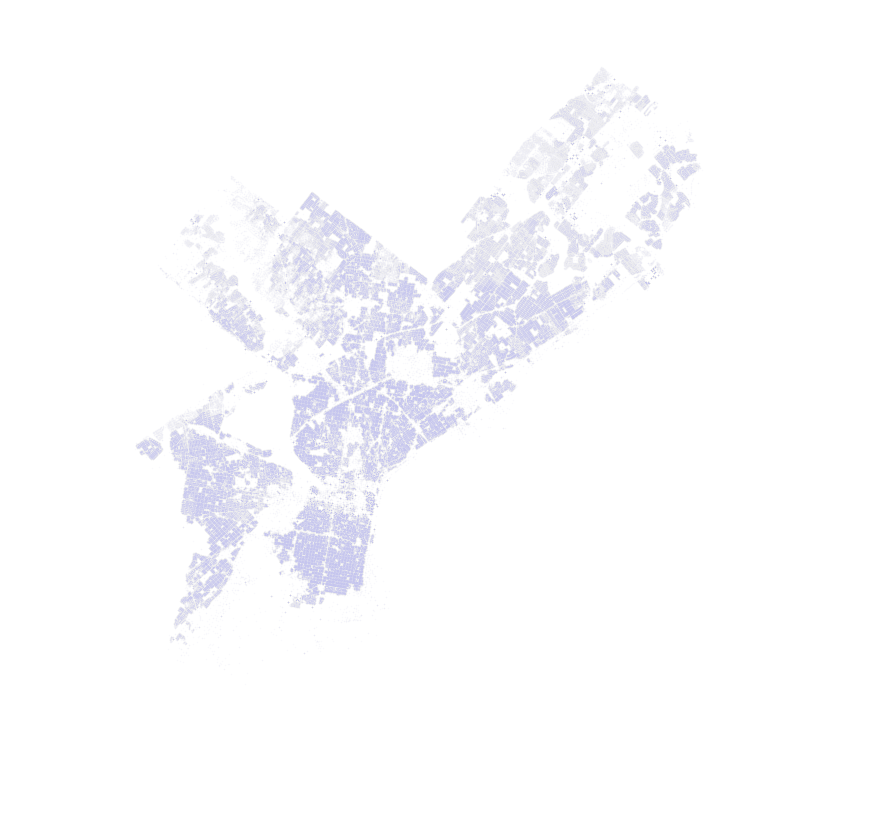

In [229]:
plt.figure(figsize=(10, 10))
plt.scatter(px, py, s=.1, alpha=.1)
plt.axis('equal')
plt.xlim(29.08, 29.20)
plt.ylim(-37.92, -37.80)
plt.axis('off')